---
## Problem Set \#2
## Perspectives on Computational Research (MACS 30200)
## Tom Curran
## April 27, 2018
---


### Question \# 1

2D kernel density estimator (3 points). The data `BQmat_orig.txt` is a 78 × 7 matrix of percentages representing the values of a two-dimensional histogram of the percent of the U.S. population that receives all the bequests (inheritances) by a recipient’s age (ages 18 to 95, rows) and by a recipient’s lifetime income group (7 categories, columns). The seven lifetime income groups are percentiles. Let $prcntlj$ be the percent of the population in lifetime income group $j$. The lifetime income groups in the $J = 7$ columns of the `BQmat_orig.txt` data are the following.

$$ prcntl = [0.25,0.25,0.20,0.10,0.10,0.09,0.01],\ such \ that \ \Sigma^7_{j=1}prcntl_j=1$$

You can read this file into memory using the `numpy.loadtxt` function

`bq_data = np.loadtxt(’BQmat_orig.txt’, delimiter=’,’)`

So the [11, 5]-th element of the `bq_data` matrix represents the percent of total bequests (inheritances) received by age-28 and lifetime income group $j = 5$ (80th to 90th percentile of lifetime income).

***


1. Read in the bequests data as a 78 × 7 NumPy array. Plot the 2D empirical histogram of these data as a 3D surface plot with age and income group on the x-axis and y-axis and the histogram density on the z-axis using a 3D surface plot tool (not a 3D bar histogram tool). Make sure that the axes are labeled correctly. And make sure that your 3D histogram is presented from a perspective that allows a viewer to see that data (don’t let the data be hidden by a poor angle of the plot.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.plotly as py
import plotly.graph_objs as go


In [2]:
bq_data = (np.loadtxt("Data/BQmat_orig.txt", delimiter=","))


In [3]:
print('Shape of BQ_mat_raw', 
      bq_data.shape)
print('Bequest distribution by income group:',
      bq_data.sum(axis=0))
print('Sum of all probabilities', bq_data.sum())

Shape of BQ_mat_raw (78, 7)
Bequest distribution by income group: [ 0.01214584  0.00817072  0.01590964  0.0139963   0.01383075  0.06927237
  0.86667437]
Sum of all probabilities 1.0


[Text(0,0,'0.00%'),
 Text(0,0,'1.00%'),
 Text(0,0,'2.00%'),
 Text(0,0,'3.00%'),
 Text(0,0,'4.00%'),
 Text(0,0,'5.00%'),
 Text(0,0,'6.00%')]

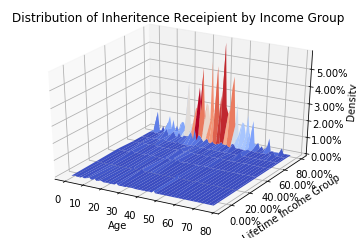

In [4]:
%matplotlib inline
#x = age 
#y = income group 
#histogram density on the z-axis

ages = np.arange(0,78)

prctl = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])

prctl_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85,
                          0.94, 0.995])

income_mat, age_mat = np.meshgrid(prctl_mdpts, ages)

fig=plt.figure()

ax = fig.gca(projection = "3d")

ax.plot_surface(age_mat, 
                income_mat, 
                bq_data,
               cmap = cm.coolwarm)

ax.set_title("Distribution of Inheritence Receipient by Income Group")

ax.set_xlabel("Age")

ax.set_ylabel("Lifetime Income Group")
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax.set_zlabel("Density")
vals_z = ax.get_zticks()
ax.set_zticklabels(['{:3.2f}%'.format(x*100) for x in vals_z])


---

Fit a bivariate kernel density estimator to the data. Use a Gaussian kernel. Choose a bandwidth parameter λ that you think is best. Justify your choice of that parameter. Plot the surface of your chosen kernel density estimator. Make sure that the axes are labeled correctly. And make sure that your 3D histogram is presented from a perspective that allows a viewer to see that data. What is the estimated density for bequest recipients who are age 61 in the 6th lifetime income category (j = 6, 90th to 99th percentile)

In [5]:
from scipy.stats import gaussian_kde

The lambda, or kernal bandwidth, controls the bias-variance trade off in the estimation of kernal density. When experimenting with different bandwidths I found the smoothed plot to far underfit the data, while a lower bandwidth estimator ( $\lambda = 1$) fits the data more appropriately and looks more like the graph in question \#1. Though the lower lambda comes at the cost of high variance, but low bias, it is more powerful with the lower lambda. Since we are not using this model to predict anything, and are more concerned with the current/simulated distribution, it is better to have a high variance and low bias than a high bias and low variance

In [6]:
bandwidth = 1.0

abils_vec = np.arange(1,8)

ages_vec = np.arange(18,96)

abils_mdpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

prop_mat_inc = np.sum(bq_data, axis=0)

prop_mat_age = np.sum(bq_data, axis=1)

lrg_samp = 70000

age_probs = np.random.multinomial(lrg_samp, prop_mat_age)

income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)

age_freq = np.array([])

inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_vec, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)

data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwidth)

data

array([[ 18.,  18.,  18., ...,  90.,  90.,  90.],
       [  1.,   1.,   1., ...,   7.,   7.,   7.]])

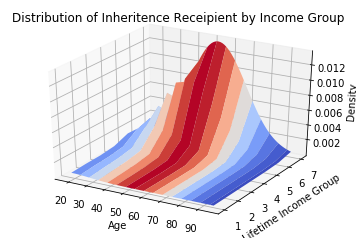

In [7]:
abils_mat, ages_mat = np.meshgrid(abils_vec, ages_vec)
coords = np.vstack([item.ravel() for item in [ages_mat, abils_mat]])
BQkde = density(coords).reshape(ages_mat.shape)
BQkde_scaled = BQkde / BQkde.sum()

fig = plt.figure()

ax = fig.gca(projection='3d')

ax.plot_surface(ages_mat, 
                abils_mat, 
                BQkde_scaled, 
                rstride =5, 
                cmap = cm.coolwarm)

ax.set_xlabel('Age')
ax.set_title("Distribution of Inheritence Receipient by Income Group")
ax.set_ylabel('Lifetime Income Group')
ax.set_zlabel('Density')
plt.show()

In [8]:
print("For those who are 61 and in the 6th lifetime income group, the density of inheretience is ",BQkde_scaled[61,6])

For those who are 61 and in the 6th lifetime income group, the density of inheretience is  0.00379504711625


Below is an example of the same plot but with a high lambda, meaning a high bias but low variance. As such, the oversmoothed fit does not tell us much about the data and does not reduce the issue of noise. 

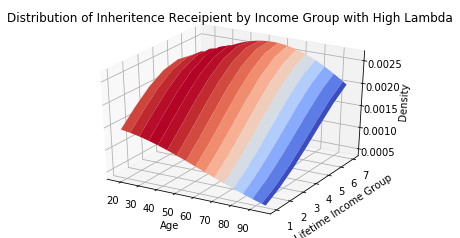

In [9]:
#high bandwidth plot
bandwidth = 5.0

abils_vec = np.arange(1,8)

ages_vec = np.arange(18,96)

abils_mdpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

prop_mat_inc = np.sum(bq_data, axis=0)

prop_mat_age = np.sum(bq_data, axis=1)

lrg_samp = 70000

age_probs = np.random.multinomial(lrg_samp, prop_mat_age)

income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)

age_freq = np.array([])

inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_vec, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)

data = np.vstack((age_freq, inc_freq))

density_highlambda = gaussian_kde(data, bw_method=bandwidth)

abils_mat, ages_mat = np.meshgrid(abils_vec, ages_vec)

coords = np.vstack([item.ravel() for item in [ages_mat, abils_mat]])

BQkde = density_highlambda(coords).reshape(ages_mat.shape)

BQkde_scaled = BQkde / BQkde.sum()


fig = plt.figure()

ax = fig.gca(projection='3d')

ax.plot_surface(ages_mat, 
                abils_mat, 
                BQkde_scaled, 
                rstride =5, 
                cmap = cm.coolwarm)

ax.set_xlabel('Age')
ax.set_title("Distribution of Inheritence Receipient by Income Group with High Lambda")
ax.set_ylabel('Lifetime Income Group')
ax.set_zlabel('Density')
plt.show()

***

### Question \#2

**2. Interaction terms (5 points).** biden.csv contains a selection of variables from the 2008 American National Election Studies. Estimate the following linear regression model:


$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon_i$$


where Y is the Joe Biden feeling thermometer, X1 is age, and X2 is education. Report the parameters and standard errors.

***

In [10]:
import statsmodels.formula.api as sm

biden = pd.read_csv("data/biden.csv")

biden.head()

biden = biden[biden['age'] >= 18].dropna()

biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1807 entries, 0 to 2321
Data columns (total 6 columns):
biden     1807 non-null float64
female    1807 non-null int64
age       1807 non-null float64
educ      1807 non-null float64
dem       1807 non-null float64
rep       1807 non-null float64
dtypes: float64(5), int64(1)
memory usage: 98.8 KB


In [11]:
model =sm.ols(formula = "biden ~ age + educ + age*educ",
             data = biden)

print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  biden   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           5.37e-07
Time:                        10:30:36   Log-Likelihood:                -8249.3
No. Observations:                1807   AIC:                         1.651e+04
Df Residuals:                    1803   BIC:                         1.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3735      9.564      4.012      0.0

$$ Biden = 37.5491 + (0.6674*age) + (1.7123*education) - (0.0477*age*education) $$

The estimate of $\beta_3$ is negative, suggesting that as a persons age and level of education increase together it will negatively effect `Biden`, meaning that older, more education people will have a less favorable opinion of Biden than younger less education people. In this regression, all of the coefficients have $p < .05$ suggesting that the coefficients are statistically significant, including the interaction term. However, the interaction term coefficient ($\beta3$) seems to indiciate a negative relationship with `biden`

In [12]:
from scipy import stats

biden3 = biden[['age','educ']]

marginal_education = 0.6674 - (0.0477 * biden3['age'])

marginal_age = 1.7123 - (0.0477 * biden3['educ'])


biden3 = pd.concat([biden3, 
                    marginal_education,                 
                    marginal_age], axis = 1)

biden3.columns.values[2] = "marginal_education"

biden3.columns.values[3] = "marginal_age"




** a) Evaluate the marginal effect of age on Joe Biden thermometer rating, conditional on education. Consider the magnitude and direction of the marginal effect, as well as its statistical significance. **

$$ Biden = \beta_0 + \beta_1age + \beta_2education + \beta_3age*education$$

$$ Biden = \beta_0 + \beta_1age + [education * (\beta_2 + \beta_3 age)] $$

** Marginal Effect of Age on `Biden` **
$$ \frac{\delta E(Biden)}{\delta age} = \beta_1 + \beta_3 education $$

$$ \psi_{age} = \beta_1 + \beta_3 education  $$ 

$$ \psi_{age} = 0.6674 - (0.0477 * education) $$ 

Based on the graph below we can see that the marginal effect of age has a negative impact on biden temperature, and from the regression out above, we can see that since it has a small $p$ value it is statistically significant.

[Link to Graph](https://plot.ly/~tom.curran/384/estimated-marginal-effect-of-age/)

graph:

![](Estimated Marginal Effect of Education.png)

In [13]:
data = [
    go.Scatter(
        x = biden3['educ'],
        y = biden3['marginal_age'],
        mode = "line",
        error_y = dict(
            type = "percent",
            value = 10
        )
    )
]

layout = dict(
    title = "Estimated Marginal Effect of Age",
    yaxis = dict(title = "Estimated Marginal Effect"),
    xaxis = dict(title = "Level of Education")
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Estimated Marginal Effect of Age")

**b) Evaluate the marginal effect of education on Joe Biden thermometer rating, conditional on age. Consider the magnitude and direction of the marginal effect, as well as its statistical significance.**

$$ Biden = \beta_0 + \beta_1age + \beta_2education + \beta_3age*education$$

$$ Biden = \beta_0 + \beta_2education + [age*(\beta_1 + \beta_3education)] $$

** Marginal Effect of Education on `Biden` **
$$ \frac{\delta E(Biden)}{\delta education} = \beta_1 + \beta_3 age$$

$$ \psi_{education} = \beta_1 + \beta_3 age  $$ 

Since we have estimated the coefficients in the above regression, we can use the estimates to calculate the marginal effects.

$$ \psi_{education} = 1.7123 - 0.0477* age  $$ 


We can see from the graph below that the direction of the marginal effect of education on Biden temperature is negative as age increases. Furthermore, from the regression out put we can see that it is statistically signficant. Compared to the marginal effects of age, it has a higher magnitude (i.e more effect) on Biden temperature.
***

![](Estimated Marginal Effect of Age.png)

In [14]:
data = [
    go.Scatter(
        x = biden3.age,
        y = biden3.marginal_education,
        mode = "line",
        error_y = dict(
            type = "percent",
            value = [1,99]
        )

    )
]

layout = dict(
    title = "Estimated Marginal Effect of Age",
    yaxis = dict(title = "Estimated Marginal Effect"),
    xaxis = dict(title = "Age")
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Estimated Marginal Effect of Age")

In [15]:
biden2 = biden[['age','educ']]

biden2 = biden2.dropna()


pred_vals = model.fit().predict(biden2)


biden2 = pd.concat([biden2, pred_vals], axis = 1)

biden2 = biden2.rename(columns = {"age": "Age", "educ":"Education", 0:"Predicted_Biden"})

biden2 = biden2.dropna()

biden2 = biden2.sort_values(by = ["Age"],ascending = True)

x = np.array(biden2['Age'])
y = np.array(biden2['Education'])
z = np.array(biden2['Predicted_Biden'])

biden2.head()

,Age,Education,Predicted_Biden
206,18.0,11.0,59.188186
569,18.0,12.0,59.980998
814,18.0,12.0,59.980998
605,18.0,9.0,57.602563
35,18.0,11.0,59.188186


![](3d graph.png)

[Link to interactive graph](https://plot.ly/~tom.curran/382/interaction-effects-of-education-and-age-on-biden/)

In [16]:
plot = go.Mesh3d(
    
    x = x,
    y = y,
    z = z,
    opacity = .5,
    color = "rgb(255, 0, 0)",
    autocolorscale = True,
    showscale = True
)

layout = go.Layout(
                    scene = dict(
                        xaxis = dict(title='Age'),
                        yaxis = dict(title='Education'),
                        zaxis = dict(title='Biden')),
                    width=700,
    title = "Interaction Effects of Education and Age on Biden"
)

fig = go.Figure(data = [plot], layout = layout)

py.iplot(fig, filename ="3d biden plot" )

<IPython.core.display.Javascript object>


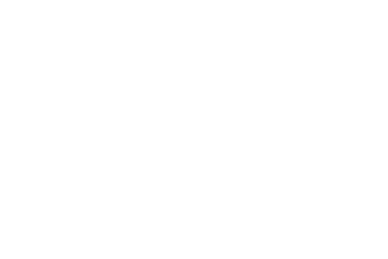

<IPython.core.display.Javascript object>


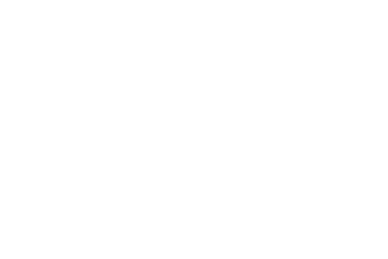

In [17]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
Z = ( 37.5491 +  0.6674 * X + 1.7123 * Y - 0.0477*X*Y )
ax.set_xlabel("Age")
ax.set_ylabel("Education")
ax.set_zlabel("Biden Score")

surf = ax.plot_surface(X,Y,Z,cmap = cm.coolwarm, linewidth = 0)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

---

### Question \#3 Parallel Computing

Parallel computing versus serial computing a bootstrapped cross val- idation (bonus). In Exercise 3 of Problem Set 4 of the MACS 30100 Perspec- tives on Computational Modeling class, you estimated a multivariable logistic model and evaluated its fit using the validation set approach (one training set and one test set). For this exercise, you will use the same Auto.csv file. This dataset includes 397 observations on miles per gallon (mpg), number of cylinders (cylinders), engine displacement (displacement), horsepower (horsepower), vehicle weight (weight), acceleration (acceleration), vehicle year (year), ve- hicle origin (origin), and vehicle name (name). We will study the factors that make miles per gallon high or low. Create a binary variable mpg high that equals 1 if mpg high≥ median(mpg high) and equals 0 if mpg high< me- dian(mpg high).

$$Pr(mpg_high=1 | X\beta) = \frac{e^{X\beta}}{1 + e^{X\beta}} $$

where 

$$ X\beta = \beta_0 + \beta_1cyl_i + \beta_2displ_i + \beta_3hpwr_i + \beta_4 wgt_i + \beta_5 accl_i + \beta_6 + yr_i + \beta_7 orgn_i$$ 


a) Using serial computation, perform an estimation of the logistic model on 100 bootstrapped training sets (with replacement) on random draws of training sets of 65% of the data. Compute the error rate for each of the 100 test sets. Calculate the average error rate. Make sure to set the seed on each of the 100 random draws so that these draws can be replicated in part (b). What is your error rate? How long did this computation take?

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
import timeit
import random
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, precision_recall_fscore_support, mean_squared_error
from sklearn.linear_model import LogisticRegression


/Users/thomascurran/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [19]:
start_time = timeit.default_timer()

autos = pd.read_csv("data/Auto.csv", na_values = "?")
autos['mpg_high']  = autos['mpg'].apply(lambda x: 1 if x > np.median(autos['mpg']) else 0)
autos = autos.drop(['mpg','name'], axis = 1 )

autos = autos.dropna()




In [20]:
y = autos.mpg_high

x = autos[['cylinders',
         'displacement',
         'horsepower',
         'weight',
         'acceleration',
         'year',
         'origin']]

In [21]:
Sims = 100
sims_mse = np.zeros(Sims)
start_time = timeit.default_timer()

for sim in range(0,Sims):
    
    #bootstrap_df = autos.sample(frac = .65, replace = True)
    xtrain, xtest, ytrain, ytest = train_test_split(x, 
                                                y,
                                                train_size = .65,
                                                random_state = sim)
    logistic = LogisticRegression()
    results = logistic.fit(xtrain,ytrain)
    yhat = logistic.predict(xtest)
    sims_mse[sim] = mean_squared_error(ytest, yhat)
    #print("Simulation #",sim," Mean Square Error: ",round(sims_mse[sim]*100,2),"%")
    
elapsed_time = timeit.default_timer() - start_time
print("Elapsed Time: ", elapsed_time, "seconds")
print("Mean Error for 100 Simulations: ", round(np.mean(sims_mse)*100,2),"%")

Elapsed Time:  0.31787631899351254 seconds
Mean Error for 100 Simulations:  11.46 %


---
Now write a function that takes as arguments the bootstrap number (1 through 100 or 0 through 99), random seed, and the the data, and estimates the logistic model on 65% of the data and calculates an error rate on the remaining 35%. Use Dask to parallelize these bootstraps. What is your error rate from this parallelized list of error rates? It should be the same as part (a). How long did this computation take?

In [22]:
from dask.distributed import Client
from dask import compute, delayed
import dask.multiprocessing

start_time2 = timeit.default_timer()

def sim_log(x, y, sim):
    xtrain, xtest, ytrain, ytest = train_test_split(x, 
                                                y,
                                                train_size = .65,
                                                random_state = sim)
    logistic = LogisticRegression()
    results = logistic.fit(xtrain,ytrain)
    yhat = logistic.predict(xtest)
    mse = mean_squared_error(ytest, yhat)
    
    return(mse)
lazy_vals = []

for sim in range(Sims):
    lazy_vals.append(delayed(sim_log)(x,y,sim))

results = compute(*lazy_vals, get=dask.multiprocessing.get, num_workers=6)

elapsed_time2 = timeit.default_timer() - start_time2

print("Total Elapsed Time: ",elapsed_time2)

print("Mean Error Rate: ",np.mean(results))

Total Elapsed Time:  0.6224237179849297
Mean Error Rate:  0.114927536232
